In [1]:
# Load libraries

import numpy as np
import pandas as pd

In [2]:
# Load data

df = pd.read_csv('aug_train.csv')

df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [3]:
# Create X and y DataFrames

from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop(['enrollee_id','target'], axis =1))
y = df[['target']]

In [4]:
# Data is imbalanced

y.value_counts()

target
0.0       14381
1.0        4777
dtype: int64

<AxesSubplot:xlabel='target'>

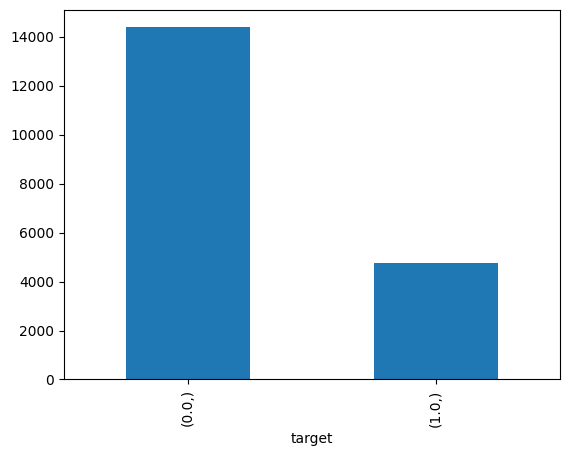

In [5]:
# Plot

y.value_counts().plot.bar()

## Parameters 

### For all sampling models

sampling_strategy: float, str, dict or callable, default=’auto’

>- float
    - When float, it corresponds to the desired ratio of the number of samples in the minority class over 
    the number of samples in the majority class after resampling. Therefore, the ratio is expressed as 
    \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class after 
    resampling and N_{M} is the number of samples in the majority class.
>- str
>    - 'minority': resample only the minority class;
>
>    - 'not minority': resample all classes but the minority class;
>
>    - 'not majority': resample all classes but the majority class;
>
>    - 'all': resample all classes;
>
>    - 'auto': equivalent to 'not majority'. 
>- dict
    - When dict, the keys correspond to the targeted classes. The values correspond to the desired number
    of samples for each targeted class.

random_state: int, RandomState instance, default=None 
- int --> Most cases use this to set a consistent random state

shrinkage: float or dict, default=None
- Shrinkage allows us to add slight noise to our data so that our resampled variables don't perfectly overlap. This could be useful for normalization of our results. A good example of how this works is located here: https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_shrinkage_effect.html
>- if **None**, a normal bootstrap will be generated without perturbation. It is equivalent to shrinkage=0 as well
>- if a **float** is given, the shrinkage factor will be used for all classes to generate the smoothed bootstrap;
>- if a **dict** is given, the shrinkage factor will specific for each class. The key correspond to the targeted class and the value is the shrinkage factor.

### For Smote and Borderline Smote
k_neighbor: sint or object, default=5
>- If int, number of nearest neighbours to used to construct synthetic samples. If object, an estimator that inherits from KNeighborsMixin that will be used to find the k_neighbors.

n_jobs: int, default=None
>- Number of CPU cores used during the cross-validation loop. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

### For Borderline Smote
kind: {“borderline-1”, “borderline-2”}, default=’borderline-1’
>- The type of SMOTE algorithm to use one of the following options: 'borderline-1', 'borderline-2'.
>    -Breakdown of difference between borderline-1 and borderline-2: https://sci2s.ugr.es/keel/pdf/specific/congreso/han_borderline_smote.pdf

Copied from Docs: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
Smote: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
Borderline Smote: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html

In [9]:
# Method 1.1: Random Oversampling

from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler()

X_o_smpl, y_o_smpl = o_smpl.fit_resample(X, y)

In [8]:
# Counts

y_o_smpl.value_counts()

target
0.0       14381
1.0       14381
dtype: int64

<AxesSubplot:xlabel='target'>

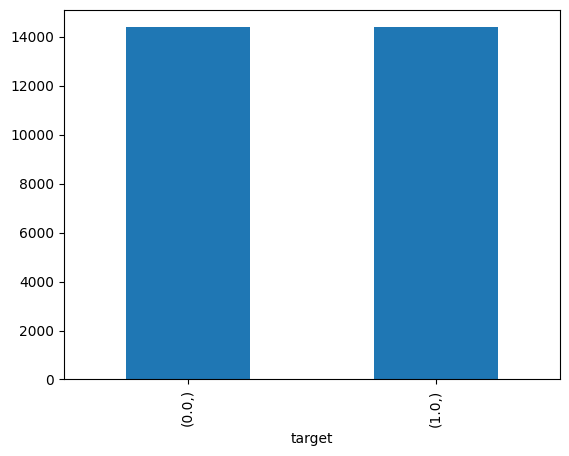

In [7]:
# Plot

y_o_smpl.value_counts().plot.bar()

In [11]:
# Method 2: Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

u_smpl = RandomUnderSampler()

X_u_smpl, y_u_smpl = u_smpl.fit_resample(X, y)

In [12]:
# Counts

y_u_smpl.value_counts()

target
0.0       4777
1.0       4777
dtype: int64

<AxesSubplot:xlabel='target'>

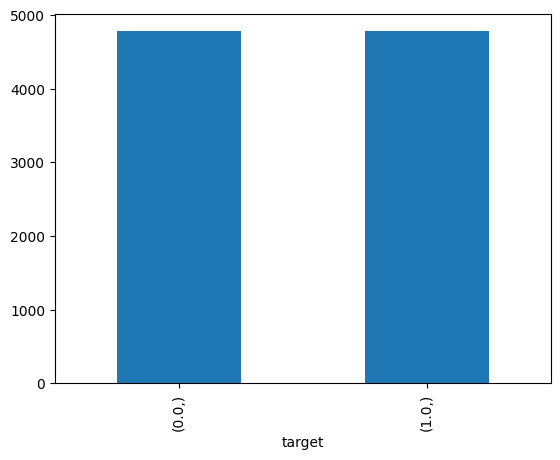

In [13]:
# Plot

y_u_smpl.value_counts().plot.bar()

In [15]:
# Method 1.2: SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

In [16]:
# Counts

y_smote.value_counts()

target
0.0       14381
1.0       14381
dtype: int64

<AxesSubplot:xlabel='target'>

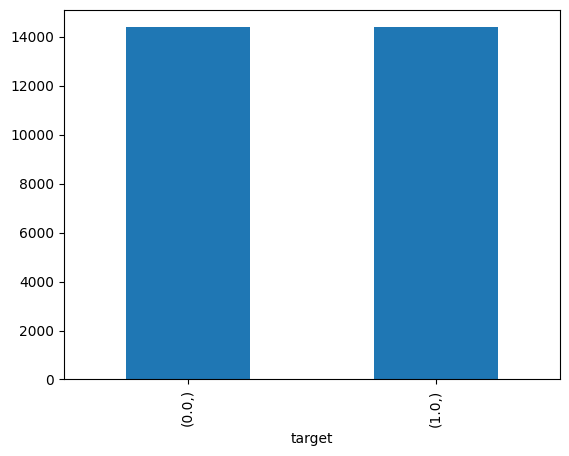

In [17]:
# Plot

y_smote.value_counts().plot.bar()

In [18]:
# Method 1.3: Borderline SMOTE

from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE()

X_bsmote, y_bsmote = bsmote.fit_resample(X, y)

In [19]:
# Counts

y_bsmote.value_counts()

target
0.0       14381
1.0       14381
dtype: int64

<AxesSubplot:xlabel='target'>

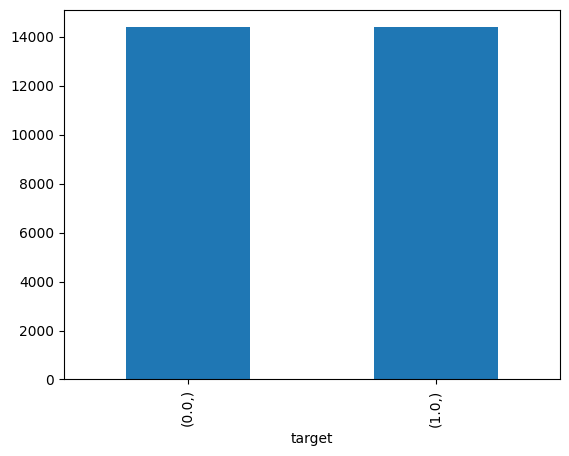

In [20]:
# Plot

y_bsmote.value_counts().plot.bar()

In [21]:
# Method 1.4: Adaptive Synthetic Oversampling (ADASYN)

from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

X_ada, y_ada = adasyn.fit_resample(X, y)

In [22]:
# Counts

y_ada.value_counts()

target
0.0       14381
1.0       14365
dtype: int64

<AxesSubplot:xlabel='target'>

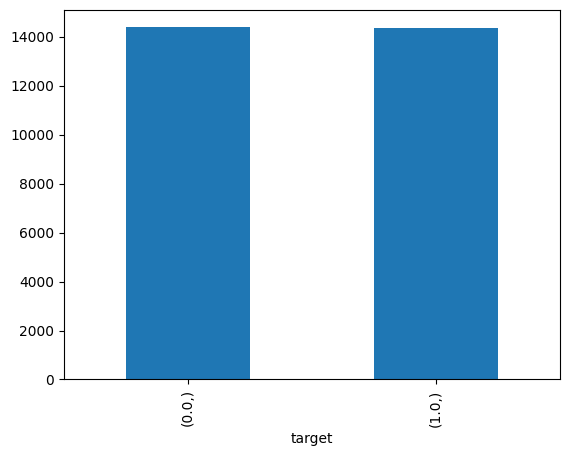

In [23]:
# Plot

y_ada.value_counts().plot.bar()